In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time

# Start timing the script
start_time = time.time()

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Function to generate synthetic ncRNA data
def generate_ncRNA_data(samples, features):
    """
    Generates synthetic ncRNA data with added noise.
    
    Parameters:
    samples (int): Number of samples to generate.
    features (int): Number of ncRNA features.
    
    Returns:
    np.ndarray: Generated data with noise.
    """
    data = np.random.rand(samples, features)
    noise = np.random.normal(0, 0.1, data.shape)
    return data + noise

# Function to generate binary labels
def generate_labels(data, noise_level=0.1):
    """
    Generates binary labels based on a weighted sum of the data.
    
    Parameters:
    data (np.ndarray): Input data.
    noise_level (float): Level of noise to add.
    
    Returns:
    np.ndarray: Generated binary labels.
    """
    weights = np.random.rand(data.shape[1])
    linear_combination = np.dot(data, weights) + np.random.randn(data.shape[0]) * noise_level
    threshold = np.percentile(linear_combination, 50)
    return (linear_combination > threshold).astype(int)

# Generate synthetic data for ncRNAs
ncRNA_data = generate_ncRNA_data(num_samples, 50)

# Generate binary labels
labels = generate_labels(ncRNA_data)

# Create DataFrame with ncRNA features and labels
columns = [f'ncRNA_{i}' for i in range(1, 51)]
df = pd.DataFrame(ncRNA_data, columns=columns)
df['label'] = labels

# Function to standardize data
def standardize_data(df, columns):
    """
    Standardizes the given DataFrame columns.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of column names to standardize.
    
    Returns:
    pd.DataFrame: Standardized DataFrame.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Standardize ncRNA data
df = standardize_data(df, columns)

# Save the dataset to a CSV file
output_file = 'ncRNA_dataset.csv'
df.to_csv(output_file, index=False)

# End timing the script
end_time = time.time()

# Print completion message and runtime
print(f"Dataset ! Saved to {output_file}")
print(f"Runtime: {end_time - start_time:.2f} seconds")

# Display the first few rows of the dataset
print(df.head())


Dataset ! Saved to ncRNA_dataset.csv
Runtime: 0.34 seconds
    ncRNA_1   ncRNA_2   ncRNA_3   ncRNA_4   ncRNA_5   ncRNA_6   ncRNA_7  \
0 -0.412172  1.879331  0.955948  0.022259 -0.544330 -1.648000 -1.397703   
1  1.803207  0.766971  1.860900  1.426351 -0.193275  1.238373 -2.036777   
2 -1.214340  0.351375 -0.576738  0.204499  1.089868 -0.818099 -0.100890   
3  1.441184 -0.824570 -0.835066 -0.508383  1.557503 -0.944379  0.197742   
4  0.050070 -2.181085 -0.940820  0.727335  0.173459 -1.359561 -1.281110   

    ncRNA_8   ncRNA_9  ncRNA_10  ...  ncRNA_42  ncRNA_43  ncRNA_44  ncRNA_45  \
0  0.940515 -0.132584  0.335745  ...  0.378543 -0.632031  1.175287 -0.951176   
1 -1.402866 -1.875007 -0.766934  ...  0.804654  0.655227 -0.049906  0.756666   
2  1.393012 -1.057598 -1.529411  ... -0.450884  0.248563 -0.047237 -0.598431   
3  1.158789 -0.886648  0.733119  ...  1.767104  1.400103  0.702738 -0.758179   
4  0.332379 -2.174547 -1.134659  ...  1.939435  1.205522 -0.608840 -1.748780   

   ncRNA_

Epoch 1/100
20/20 [==============================] - 7s 67ms/step - loss: 0.6994 - accuracy: 0.5437 - val_loss: 0.6348 - val_accuracy: 0.6562
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5762 - accuracy: 0.7500 - val_loss: 0.5641 - val_accuracy: 0.7375
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4782 - accuracy: 0.8422 - val_loss: 0.4830 - val_accuracy: 0.8250
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3763 - accuracy: 0.9016 - val_loss: 0.4084 - val_accuracy: 0.8438
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2835 - accuracy: 0.9344 - val_loss: 0.3511 - val_accuracy: 0.8562
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2139 - accuracy: 0.9531 - val_loss: 0.3167 - val_accuracy: 0.8562
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9703 - val_loss: 0.2892 - val_accuracy: 0.8500
Epoch 8/100


KeyError: 'loss'

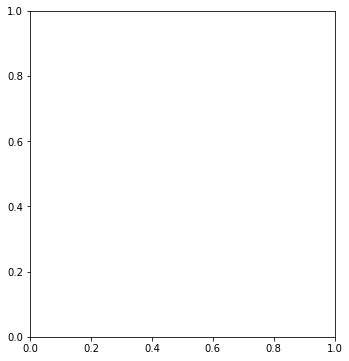

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('ncRNA_dataset.csv')

# Preprocess the dataset
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the DQN model
def build_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
input_dim = X_train.shape[1]
model = build_model(input_dim)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Test the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'ROC AUC: {roc_auc * 100:.2f}%')

# Visualization of training history
import matplotlib.pyplot as plt

history = model.history.history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
